## Random Forest Predicting a Sale Price

In [ ]:
!rm ~/.local/share/jupyter/nbsignatures.db

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


## Importing libraries 

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics
import feather

## Visualization libraries

In [3]:
import seaborn as sns
plt.style.use('fivethirtyeight')

In [4]:
df = pd.read_csv('excel/HousesData/train.csv')

### Inspecting the data  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### How does our data look like?

In [6]:
df.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [7]:
def display_all(df):
    with pd.option_context("display.max_rows", 2000, "display.max_columns", 1000): 
        display(df)

In [8]:
display_all(df.tail(10).T)

,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,60,78,35,90,62,62,85,66,68,75
LotArea,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,Pave,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub,AllPub


#### Checking for the percentage of null values in the features

In [9]:
display_all(df.isnull().sum().sort_index()/len(df) *100)

1stFlrSF          0.000000
2ndFlrSF          0.000000
3SsnPorch         0.000000
Alley            93.767123
BedroomAbvGr      0.000000
BldgType          0.000000
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtFinType1      2.534247
BsmtFinType2      2.602740
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
BsmtQual          2.534247
BsmtUnfSF         0.000000
CentralAir        0.000000
Condition1        0.000000
Condition2        0.000000
Electrical        0.068493
EnclosedPorch     0.000000
ExterCond         0.000000
ExterQual         0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
Fence            80.753425
FireplaceQu      47.260274
Fireplaces        0.000000
Foundation        0.000000
FullBath          0.000000
Functional        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageCond        5.547945
GarageFinish      5.547945
GarageQual        5.547945
GarageType        5.547945
G

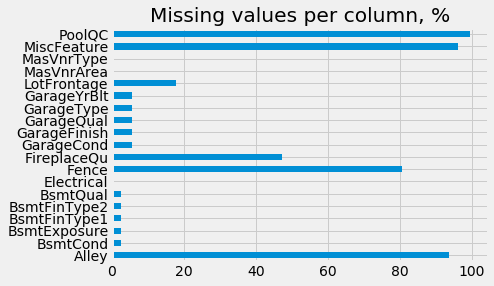

In [10]:
nan_vals =df.isnull().sum().sort_index()/len(df) *100
nan_vals[nan_vals>0].plot(title='Missing values per column, %',kind='barh')

### Describing the data, understanding the structures and statistical distributions.  

In [11]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Prices are currently presented in thousands we can convert the values in a log function this way we shall be dealing with a smaller number, but also that number can be converted back by calling the exponent on the column.

In [12]:
df['SalePricelog']=np.log(df['SalePrice'])

In [13]:
 df[['SalePrice','SalePricelog']].tail() #= np.exp(df['SalePricelog'])

,SalePrice,SalePricelog
1455,175000,12.072541
1456,210000,12.254863
1457,266500,12.493130
1458,142125,11.864462
1459,147500,11.901583


### Histogram for the Sale Price (Target Variable)

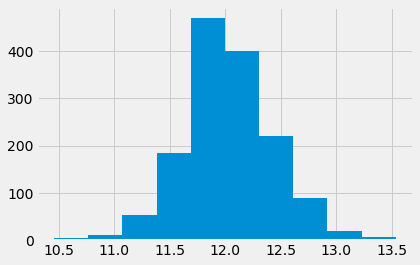

In [14]:
df['SalePricelog'].hist()

In [15]:
df['SalePricelog'].describe(include='all')

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePricelog, dtype: float64

Here we have no missing values in our target variable, this is important because we don't have to impute any row with anything, we also able to confirm the mean we saw earlier on the Histogram.

### Experimenting with combining multiple features

We can experiment with combining multiple features, for example, we have alot of features that are explicitly expressed in Area. We can sum up the total Area for each House to see the effect of the summed area on a house.

In [16]:
df['Total Area'] = df['GarageArea'] +df['LotArea']+df['PoolArea'] +df['GrLivArea']

In [17]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [18]:
os.makedirs('tmph',exist_ok=True)
df.to_feather('tmph/houseSale')

In [19]:
df = feather.read_dataframe('tmph/houseSale')

In [20]:
df = df.drop(['SalePrice'], axis= 1)

Now we want all our categorical data to be numerical rather than string objects for this we shall employ FastAI's __proc_df()__ function.

Before we do that we might want use the pandas dataframe to turn data string data into categorical data.

In [21]:
#This changes the way pandas sees the strings in the dataframe, it instead now sees categories.
train_cats(df)

In [22]:
df.MSZoning = df.MSZoning.cat.codes

In [23]:
dfh, y, nas = proc_df(df, 'SalePricelog', max_n_cat=8)

In [72]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
dfh.columns

In [24]:
dfh.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Total Area,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
1455,1456,60,3,62.0,7917,2,0,4,4,1,...,0,0,8,2007,9,5,10024,False,False,False
1456,1457,20,3,85.0,13175,2,0,4,4,1,...,0,0,2,2010,9,5,15748,False,False,False
1457,1458,70,3,66.0,9042,2,0,4,4,1,...,3,2500,5,2010,9,5,11634,False,False,False
1458,1459,20,3,68.0,9717,2,0,4,4,1,...,0,0,4,2010,9,5,11035,False,False,False
1459,1460,20,3,75.0,9937,2,0,4,4,1,...,0,0,6,2008,9,5,11469,False,False,False


 Null values sorted now we move onto creating a model.

In [25]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(dfh, y)
model.score(dfh, y)

0.9753872602947519

# Split function: splitting the dat into two set the valid and the trainning set 

In [26]:
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

n_valid = 460
n_train = len(dfh)-n_valid
df_train, df_valid = split_vals(df, n_train)
X_train, X_valid = split_vals(dfh, n_train)
y_train, y_valid = split_vals(y, n_train)

X_train.shape, y_train.shape, y_valid.shape,df_train.shape

((1000, 84), (1000,), (460,), (1000, 82))

In [27]:

def rmse(x,y): return math.sqrt(((x-y)**2).mean())

# Helper function to print the RMSE

def print_score(model):
     res = [f"train_set_RMSE: {rmse(model.predict(X_train), y_train)}", 
            f'Validation_set_rmse: {rmse(model.predict(X_valid), y_valid)}',
            f'train_set_score: {model.score(X_train, y_train)}', 
            f'validation_set_score: {model.score(X_valid, y_valid)}']
     if hasattr(model, 'oob_score_'): res.append(model.oob_score_)
     print(res)

In [28]:
model = RandomForestRegressor(n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 234 ms, sys: 15.6 ms, total: 250 ms
Wall time: 123 ms
['train_set_RMSE: 0.0651899280162489', 'Validation_set_rmse: 0.146165085555054', 'train_set_score: 0.9741865333393698', 'validation_set_score: 0.8556291191904568']


In [29]:
model  = RandomForestRegressor(n_estimators=1, max_depth=5, bootstrap=False, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 0 ns, sys: 15.6 ms, total: 15.6 ms
Wall time: 120 ms
['train_set_RMSE: 0.1534649923200544', 'Validation_set_rmse: 0.1968847021614397', 'train_set_score: 0.8569446929876724', 'validation_set_score: 0.7380512913076398']


In [30]:
model  = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 46.9 ms, sys: 15.6 ms, total: 62.5 ms
Wall time: 157 ms
['train_set_RMSE: 2.9179300348775473e-05', 'Validation_set_rmse: 0.2364318132939325', 'train_set_score: 0.9999999948282792', 'validation_set_score: 0.6222502879661882']


In [31]:
dfcorr = df.corr()
dfcorr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePricelog,Total Area
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,...,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.017942,-0.031551
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,...,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959,-0.135213
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,-0.160099,0.186951,-0.308908,-0.174728,-0.067487,...,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,-0.188860,-0.042026
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,...,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355878,0.449814
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,...,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320,0.998046
OverallQual,-0.028365,0.032628,-0.160099,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,...,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817184,0.146396
OverallCond,0.012609,-0.059316,0.186951,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,...,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868,-0.012828
YearBuilt,-0.012713,0.027850,-0.308908,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,...,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.586570,0.034298
YearRemodAdd,-0.021998,0.040581,-0.174728,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,...,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.565608,0.036177
MasVnrArea,-0.050298,0.022936,-0.067487,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,...,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.430809,0.130175


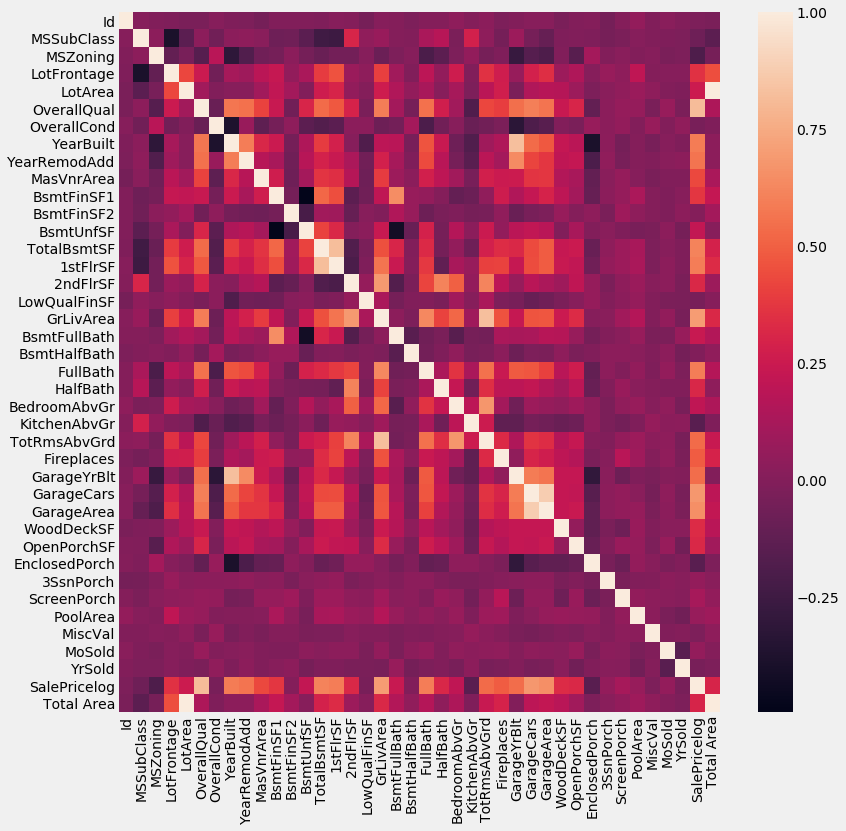

In [32]:
plt.figure(figsize=(12,12))
sns.heatmap(dfcorr)

Feature that we might need to focus on 

In [33]:
dfcorr['SalePricelog'].sort_values(ascending=False).head(10)

SalePricelog    1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
Name: SalePricelog, dtype: float64

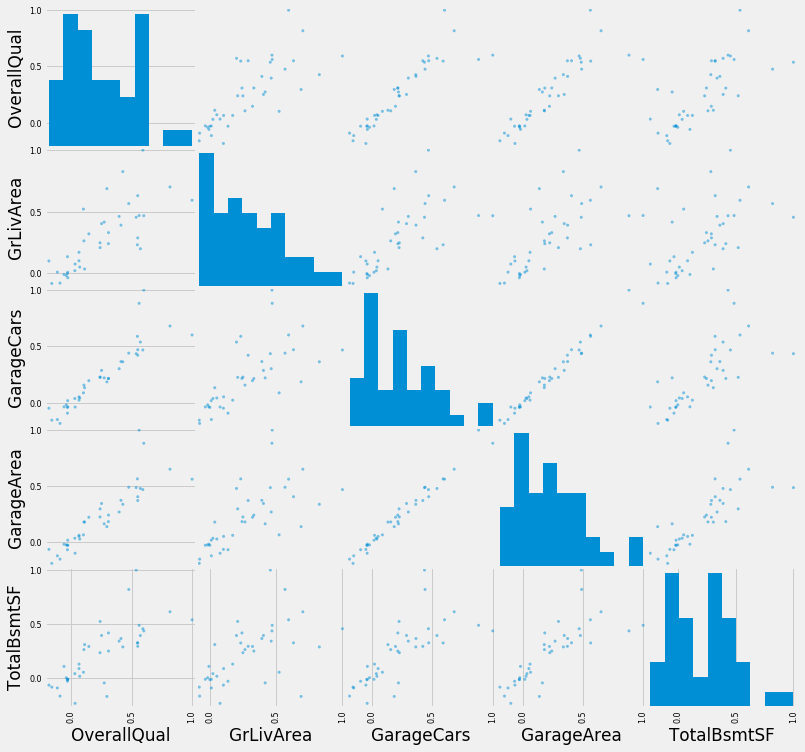

In [34]:
from pandas.plotting import scatter_matrix

attribute = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF']
scatter_matrix(dfcorr[attribute], figsize=(12,12))

plt.show()


In [35]:
#df['SalePrice'].hist(kind='kde')

In [36]:
predictions = np.stack([t.predict(X_valid) for t in model.estimators_])
predictions[:,0], np.mean(predictions[:,0]), y_valid[0]

(array([10.54271]), 10.542706391070517, 11.314474526246391)

In [37]:
# tree predictions 
predictions.shape

(1, 460)

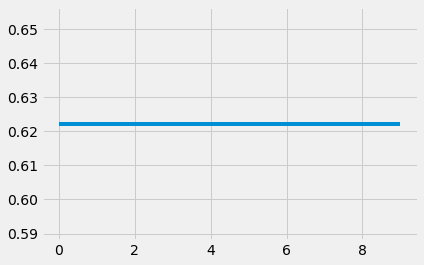

In [38]:
plt.plot([metrics.r2_score(y_valid, np.mean(predictions[:i+1], axis=0)) for i in range(10)])

In [39]:
model = RandomForestRegressor(n_estimators=45,max_depth=3, bootstrap=False, n_jobs=-1)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 469 ms, sys: 15.6 ms, total: 484 ms
Wall time: 261 ms
['train_set_RMSE: 0.2125623241433244', 'Validation_set_rmse: 0.22701830847364304', 'train_set_score: 0.7255533653393078', 'validation_set_score: 0.6517315903877794']


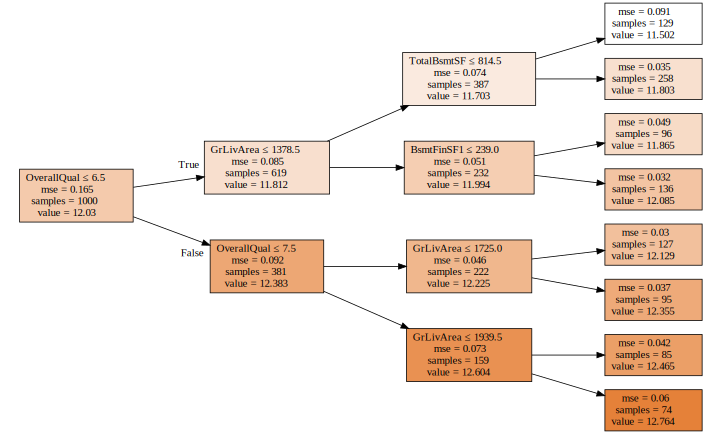

In [40]:
draw_tree(model.estimators_[0], dfh, precision=3)

In [41]:
dfh_trn, y_trn, nas = proc_df(df, 'SalePricelog')
X_train, X_valid = split_vals( dfh_trn, n_train)
y_train, y_valid = split_vals( y_trn, n_train)

In [42]:
model = RandomForestRegressor(n_estimators=45,n_jobs=-1, oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 1.36 s, sys: 46.9 ms, total: 1.41 s
Wall time: 536 ms
['train_set_RMSE: 0.057151176398863884', 'Validation_set_rmse: 0.14231484375136405', 'train_set_score: 0.9801602736132362', 'validation_set_score: 0.8631349007993758', 0.8566353413549653]


In [43]:
predictions = np.stack([t.predict(X_valid) for t in model.estimators_])
np.mean(predictions[:,0]), np.std(predictions[:,0])

(11.337262196202092, 0.3281717401701004)

In [44]:
#def get_prediction(t): return t.predict(X_valid)
#prediction = np.stack(parallel_trees(model, get_prediction))
#np.mean(prediction[:,0]), np.std(prediction[:,0])

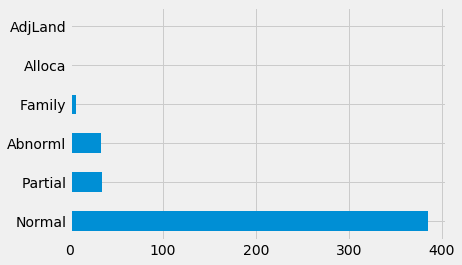

In [45]:
x = df_valid.copy()
x['predictions_std'] = np.std(predictions, axis=0)
x['Mean_preds'] = np.mean(predictions, axis=0)
x.SaleCondition.value_counts().plot.barh();

In [46]:
df_valid.head().T

,1000,1001,1002,1003,1004
Id,1001,1002,1003,1004,1005
MSSubClass,20,30,20,90,120
MSZoning,3,3,3,3,3
LotFrontage,74,60,75,NaN,43
LotArea,10206,5400,11957,11500,3182
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,IR1,IR1,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [47]:
from pdpbox import pdp
from plotnine import *

In [48]:
fi = rf_feat_importance(model, dfh)
fi[:20]

,cols,imp
17,OverallQual,0.543357
46,GrLivArea,0.113841
38,TotalBsmtSF,0.047052
61,GarageCars,0.036745
34,BsmtFinSF1,0.022038
43,1stFlrSF,0.021544
19,YearBuilt,0.020712
62,GarageArea,0.019750
80,Total Area,0.013485
20,YearRemodAdd,0.012812


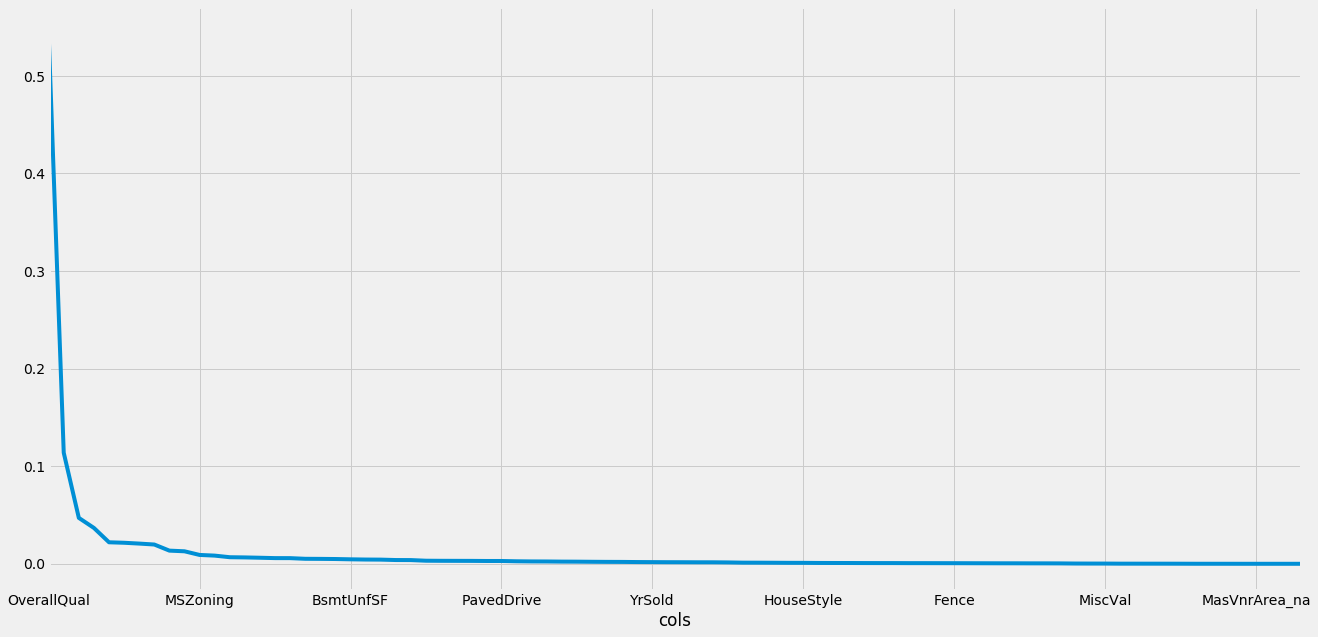

In [49]:
fi.plot('cols', 'imp', figsize=(20,10), legend=False)

In [50]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh',
                                figsize=(16,10), legend=False)

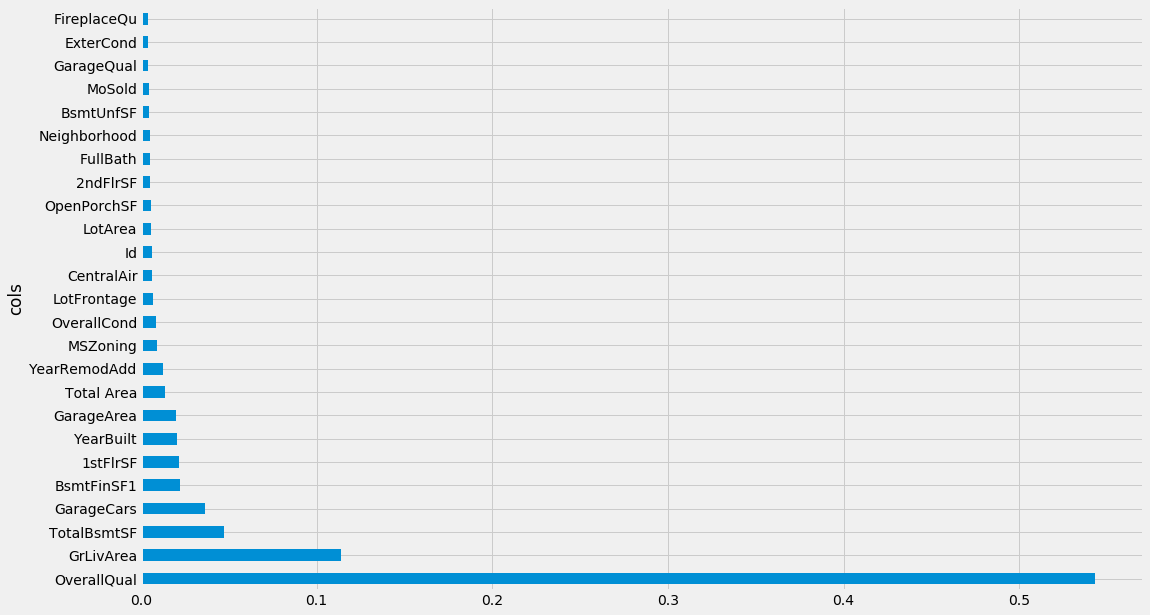

In [51]:
plot_fi(fi[:25])

In [52]:
to_keep = fi[fi.imp>0.02].cols; len(to_keep)

7

In [53]:
df_keep = dfh[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_train)

In [54]:
model = RandomForestRegressor(n_estimators=45,min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
%time model.fit(X_train,y_train)
print_score(model)

CPU times: user 250 ms, sys: 0 ns, total: 250 ms
Wall time: 190 ms
['train_set_RMSE: 0.11028915463121264', 'Validation_set_rmse: 0.15522265436485147', 'train_set_score: 0.926115907140033', 'validation_set_score: 0.8371819581244163', 0.8301132047332433]


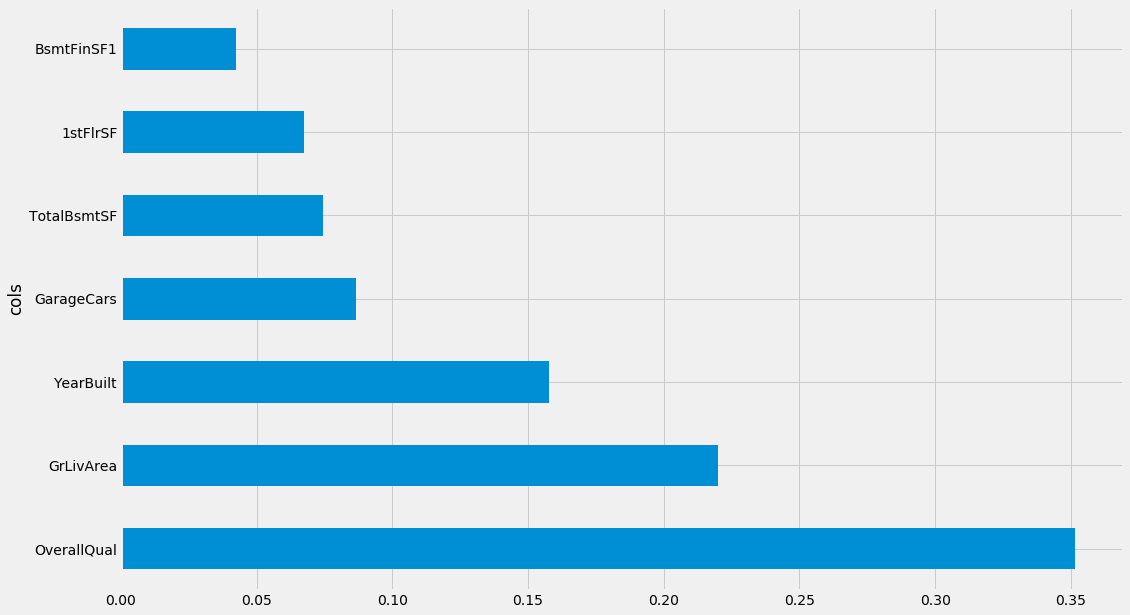

In [55]:
fi = rf_feat_importance(model, df_keep)
plot_fi(fi)

In [56]:
dfh, y, nas = proc_df(df, 'SalePricelog', max_n_cat=8)
X_train, X_valid =split_vals(dfh, n_train)

In [57]:
model = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
model.fit(X_train, y_train)
print_score(model)

['train_set_RMSE: 0.08147611547235126', 'Validation_set_rmse: 0.14127874932841628', 'train_set_score: 0.9596776384146285', 'validation_set_score: 0.8651204838959118', 0.8592112627612859]


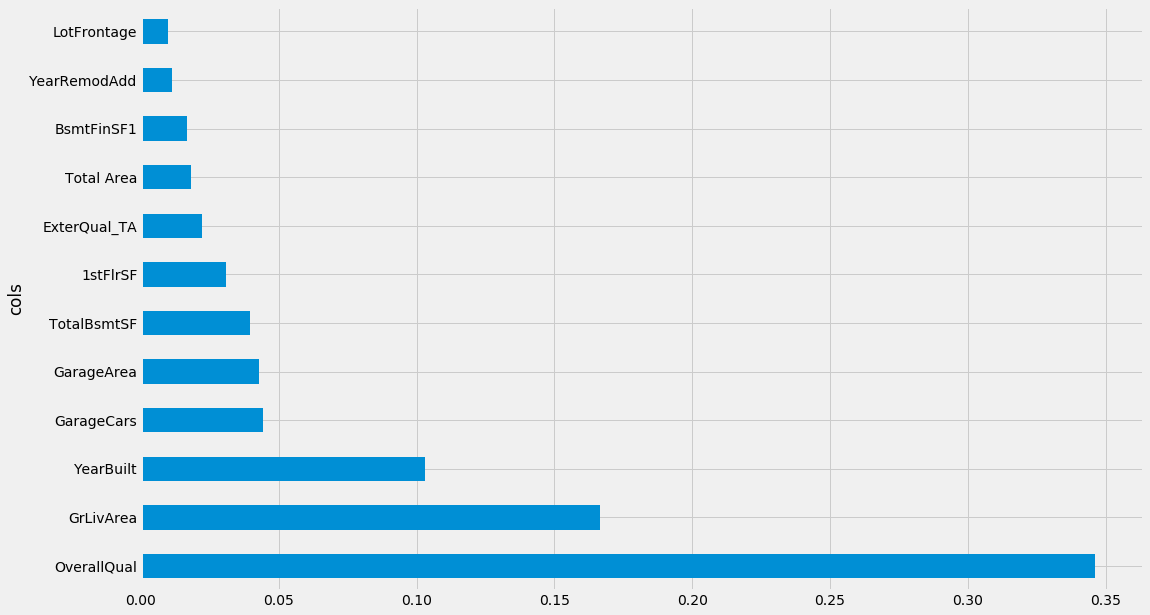

In [58]:
fi = rf_feat_importance(model,dfh)
plot_fi(fi[:12]);

In [59]:

from scipy.cluster import hierarchy as hc

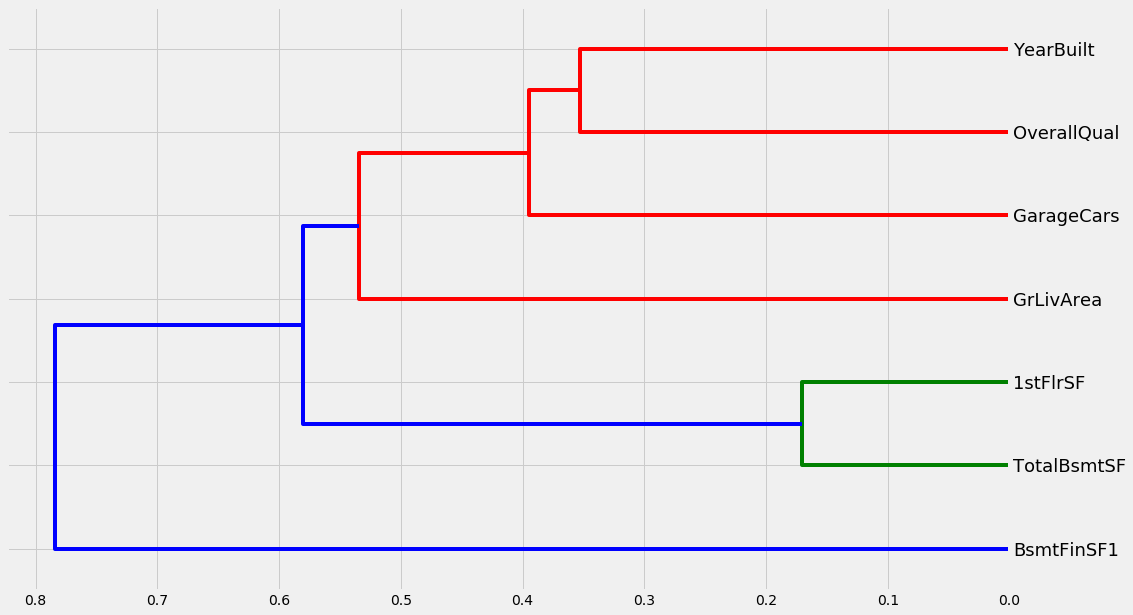

In [60]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condesed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condesed,method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=18)
plt.show()

In [61]:
df_keep['OverallQual'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

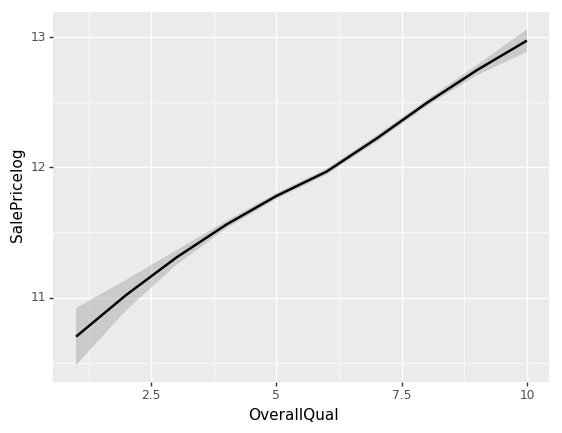

<ggplot: (-9223363243597444948)>

In [62]:
ggplot(df, aes( 'OverallQual','SalePricelog'))+stat_smooth(se=True, method='loess')

In [63]:
x=dfh

In [64]:
def plot_pdp(feat, clusters=None, feat_name=None):
     feat_name = feat_name or feat
     p = pdp.pdp_isolate(model,x,x.columns, feat)
     return pdp.pdp_plot(p, feat_name, plot_lines= True,
                   cluster=clusters is not None, 
                   n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff56dd5f0f0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7ff56dcc5198>})

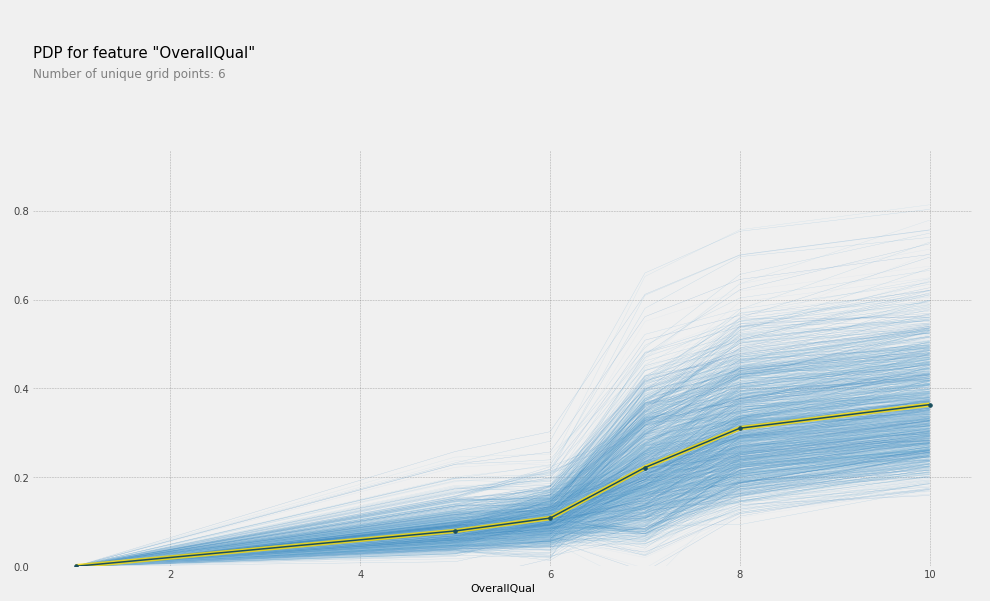

In [65]:
plot_pdp('OverallQual') #, clusters=6)

In [66]:
%time preds = np.stack([t.predict(X_valid) for t in model.estimators_])
np.mean(preds[:,0]),np.std(preds[:,0])

CPU times: user 578 ms, sys: 0 ns, total: 578 ms
Wall time: 582 ms


(11.351243616505503, 0.2323707886989799)

In [67]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(model, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 46.9 ms, sys: 625 ms, total: 672 ms
Wall time: 2.13 s


(11.351243616505503, 0.2323707886989799)

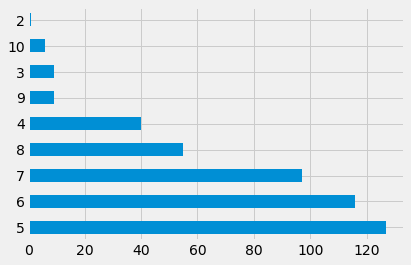

In [68]:
x = df_valid.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.OverallQual.value_counts().plot.barh();

In [69]:
flds = ['OverallQual', 'SalePricelog', 'pred', 'pred_std']
enc_summ = x[flds].groupby('OverallQual',as_index=False).mean()
enc_summ

,OverallQual,SalePricelog,pred,pred_std
0,2,11.002100,11.011639,0.334300
1,3,11.374574,11.489384,0.252051
2,4,11.550224,11.609163,0.201076
3,5,11.796038,11.807308,0.149548
4,6,11.975274,11.935339,0.143869
5,7,12.213652,12.219704,0.130574
6,8,12.462245,12.488387,0.160192
7,9,12.797877,12.760236,0.184816
8,10,12.932785,12.886150,0.222281
